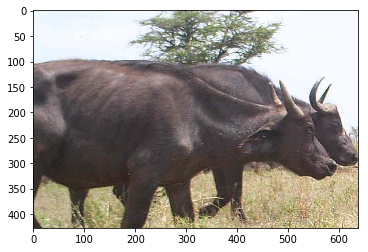

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:\Wildlife Dataset"

CATEGORIES = ["Buffalo", "Cheetah", "Elephant", "GazelleThomsons", "Giraffe", "Hartebeest", 
              "Lionfemale&Cub", "Lionmale", "Ostrich", "SecretaryBird", "Wildebeest", "Zebra"]

for category in CATEGORIES:
    #print(category)
    path = os.path.join(DATADIR,category)  # create path to the animals folder
    #print(path)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #print("Get image in path: " + path)
        #print("Image path: " + img)
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [3]:
print(img_array)

[[[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 [[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 [[255 251 240]
  [255 251 240]
  [255 251 240]
  ...
  [255 250 247]
  [255 250 247]
  [255 250 247]]

 ...

 [[ 40  48  61]
  [ 40  48  61]
  [ 41  47  58]
  ...
  [185 223 235]
  [172 212 224]
  [152 192 204]]

 [[ 39  47  60]
  [ 39  47  60]
  [ 41  47  58]
  ...
  [200 238 250]
  [180 218 230]
  [152 192 204]]

 [[ 37  46  56]
  [ 38  47  57]
  [ 42  48  59]
  ...
  [212 248 255]
  [176 212 222]
  [138 177 186]]]


In [4]:
print(img_array.shape)

(427, 638, 3)


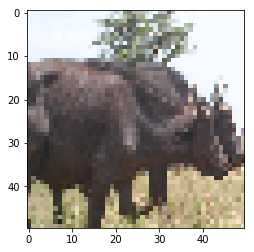

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.imshow(new_array) #not required cmap='gray'
plt.show()

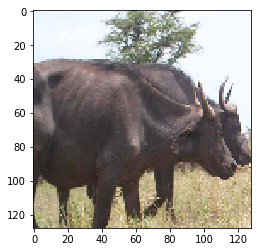

In [6]:
IMG_SIZE = 128

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.imshow(new_array) #not required cmap='gray'
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  
        # get the classification  (0,1,2,3 or 4) 
        #0=buffalo 1=gazelleThomsons, 2=Hartebeest, 3=Wildebeest, 4=Zebra

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
                                            # tqdm creates the percentage bar
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

 48%|██████████████████████████████████████▌                                         | 387/804 [00:10<00:11, 37.68it/s]

In [7]:
import random

random.shuffle(training_data)

In [8]:
training_data[499][0] # Image array final sample
#training_data[24945][1] # Classification

array([[[242, 206, 196],
        [242, 206, 196],
        [243, 207, 197],
        ...,
        [238, 213, 208],
        [237, 208, 203],
        [193, 163, 158]],

       [[244, 208, 198],
        [244, 208, 198],
        [243, 207, 197],
        ...,
        [248, 229, 228],
        [248, 227, 225],
        [217, 194, 193]],

       [[244, 209, 197],
        [244, 209, 197],
        [244, 208, 201],
        ...,
        [250, 239, 238],
        [247, 233, 234],
        [243, 227, 228]],

       ...,

       [[119, 129, 142],
        [ 76,  94, 101],
        [ 56,  87, 102],
        ...,
        [ 82, 103, 107],
        [ 66,  94, 101],
        [ 71,  95, 102]],

       [[ 45,  68,  84],
        [ 49,  69,  80],
        [ 48,  68,  86],
        ...,
        [ 85, 104, 114],
        [ 34,  64,  75],
        [ 35,  62,  73]],

       [[ 56,  74,  84],
        [ 73,  89,  94],
        [ 30,  49,  56],
        ...,
        [ 81, 113, 126],
        [ 70,  99, 113],
        [ 57,  80, 101]]

In [9]:
for sample in training_data[:10]:
    print(sample[1])

6
6
4
0
5
1
0
10
11
2


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(X[0])
print(X.shape)

[[[  0   0   0]
  [  1   1   1]
  [  4   4   4]
  ...
  [  5   5   5]
  [  0   0   0]
  [  5   5   5]]

 [[  5   5   5]
  [  0   0   0]
  [  6   6   6]
  ...
  [  3   3   3]
  [ 12  12  12]
  [  4   4   4]]

 [[  4   4   4]
  [  8   8   8]
  [  3   3   3]
  ...
  [  8   8   8]
  [  4   4   4]
  [  5   5   5]]

 ...

 [[  5   5   5]
  [  2   2   2]
  [ 12  12  12]
  ...
  [ 60  60  60]
  [ 15  15  15]
  [107 107 107]]

 [[  3   3   3]
  [ 10  10  10]
  [  7   7   7]
  ...
  [136 136 136]
  [ 64  64  64]
  [100 100 100]]

 [[  5   5   5]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 35  35  35]
  [ 90  90  90]
  [101 101 101]]]
(14283, 128, 128, 3)


In [11]:
y = np.array(y)
y = y.reshape((14283,1))
y.shape
print(y)

[[6]
 [6]
 [4]
 ...
 [2]
 [1]
 [0]]


In [12]:
from numpy import array  #unneccessary as aldy imported above
from numpy import argmax
from keras.utils import to_categorical


Using TensorFlow backend.


In [13]:
y_encoded = to_categorical(y)
print(y_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [14]:
print(y_encoded.shape)

(14283, 12)


In [15]:
import pickle

pickle_out = open("X_12classes128.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_12classes128.pickle","wb")
pickle.dump(y_encoded, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X_12classes128.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_12classes128.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
X.shape

(14283, 128, 128, 3)

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
y.shape

(14283, 12)